In [1]:
%matplotlib inline

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def thresh(image,max_value):
    if max_value > 200:
        limit = 65
        _, thresh = cv2.threshold(image,np.amax(image)-limit, 255, cv2.THRESH_BINARY_INV)
    elif max_value < 180:
        limit = 45
        _, thresh = cv2.threshold(image,np.amax(image)-limit, 255, cv2.THRESH_BINARY_INV)
    else:
        otsu, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    

    #
    return thresh

In [3]:
def erode(image):
    kernel = np.ones((4,4), np.uint8)
    erosion = cv2.erode(image, kernel, iterations=1)
    return erosion

In [4]:
def max_objects(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    areas =[]
    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        areas.append(area)

    mask = np.zeros_like(opening)
    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if area > np.amax(areas)/2:
            cv2.drawContours(mask, [contour], -1, 255, -1)

    result = cv2.bitwise_and(image, image, mask=mask)
    return result

In [5]:
def fill_empty(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30,30))
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    return closing

In [6]:
def borderfilter(gray):
    y,x = gray.shape
    new_image = gray[40:y-40, 40:x-40]
    return new_image

In [7]:
def apply_mask(image,final_mask):
    new_shape = (image.shape[1], image.shape[0])
    final_mask = cv2.resize(final_mask, new_shape, interpolation = cv2.INTER_LINEAR)
    apply = cv2.bitwise_and(image, image, mask=final_mask)
    return apply

In [8]:
def DrawContour(LSF,p1,p2):
    plt.clf();
    new_image = np.zeros(img.shape);
    fig, ax = plt.subplots()
    plt.imshow(Image),plt.xticks([]), plt.yticks([]);
    countours = ax.contour(LSF,[0],color = p1,linewidth = p2); 
    plt.show(block=False),plt.pause(0.01);

def mat_math (intput,str):
    output=intput;
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if str=="atan":
                output[i,j] = math.atan(intput[i,j]);
            if str=="sqrt":
                output[i,j] = math.sqrt(intput[i,j]);
    return output;

def RSF (LSF, img, mu, nu, epison,step,lambda1,lambda2,kernel):

    Drc = (epison / math.pi) / (epison*epison+ LSF*LSF);
    Hea = 0.5*(1 + (2 / math.pi)*mat_math(LSF/epison,"atan"));
    Iy, Ix = np.gradient(LSF);
    s = mat_math(Ix*Ix+Iy*Iy,"sqrt");
    Nx = Ix / (s+0.000001);
    Ny = Iy / (s+0.000001);
    Mxx,Nxx =np.gradient(Nx);
    Nyy,Myy =np.gradient(Ny);
    cur = Nxx + Nyy;
    Length = nu*Drc*cur;

    Lap = cv2.Laplacian(LSF,-1);
    Penalty = mu*(Lap - cur);

    KIH = cv2.filter2D(Hea*img,-1,kernel);
    KH = cv2.filter2D(Hea,-1,kernel);
    f1 = KIH / KH; 
    KIH1 = cv2.filter2D((1-Hea)*img,-1,kernel);
    KH1 = cv2.filter2D(1-Hea,-1,kernel);
    f2 = KIH1 / KH1; 
    R1 = (lambda1- lambda2)*img*img;
    R2 = cv2.filter2D(lambda1*f1 - lambda2*f2,-1,kernel);
    R3 = cv2.filter2D(lambda1*f1*f1 - lambda2*f2*f2,-1,kernel);
    RSFterm = -Drc*(R1-2*R2*img+R3);

    LSF = LSF + step*(Length + Penalty + RSFterm);
    #plt.imshow(s, cmap ='gray'),plt.show();
    return LSF;

In [9]:
def img_show(img, mask, final_mask, apply_mask,name):
    fig = plt.figure(figsize=(20,5))
    fig.suptitle(name)

    fig.add_subplot(1,4,1)
    plt.imshow(img,cmap='gray')
    plt.title('original')

    fig.add_subplot(1,4,2)
    plt.imshow(mask, cmap='gray')
    plt.title('threshold')

    fig.add_subplot(1,4,3)
    plt.imshow(final_mask, cmap='gray')
    plt.title('final_mask')

    fig.add_subplot(1,4,4)
    plt.imshow(apply_mask, cmap='gray')
    plt.title('apply_mask')

    plt.show()
    

In [10]:
folder = "C:/Users/josei/OneDrive/UAZ/2_Tesis/skin_cancer_detection/dataset/image_separate/mel"
files_names = os.listdir(folder)

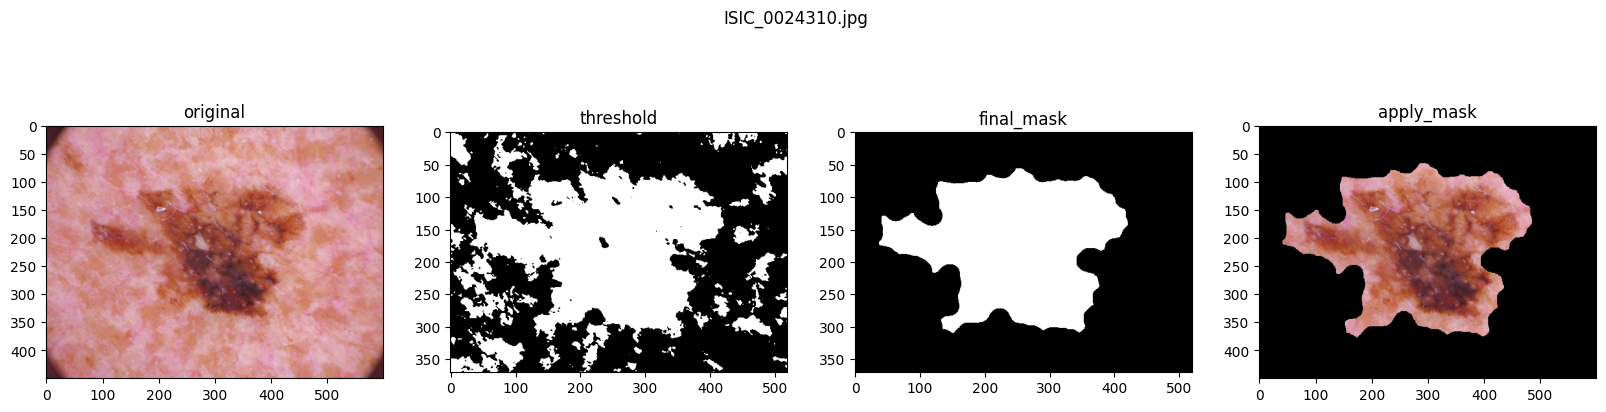

In [23]:
name = files_names[files_names.index('ISIC_0024310.jpg')]
image = cv2.imread(folder+'/'+name)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

filter = borderfilter(gray)
blur = cv2.medianBlur(filter,3)

max_value = np.amax(blur)

mask = thresh(blur,max_value)
erosion = erode(mask)
result = max_objects(erosion)
final_mask = fill_empty(result)
apply = apply_mask(image_rgb,final_mask)

img_show(image_rgb, mask, final_mask, apply,name)

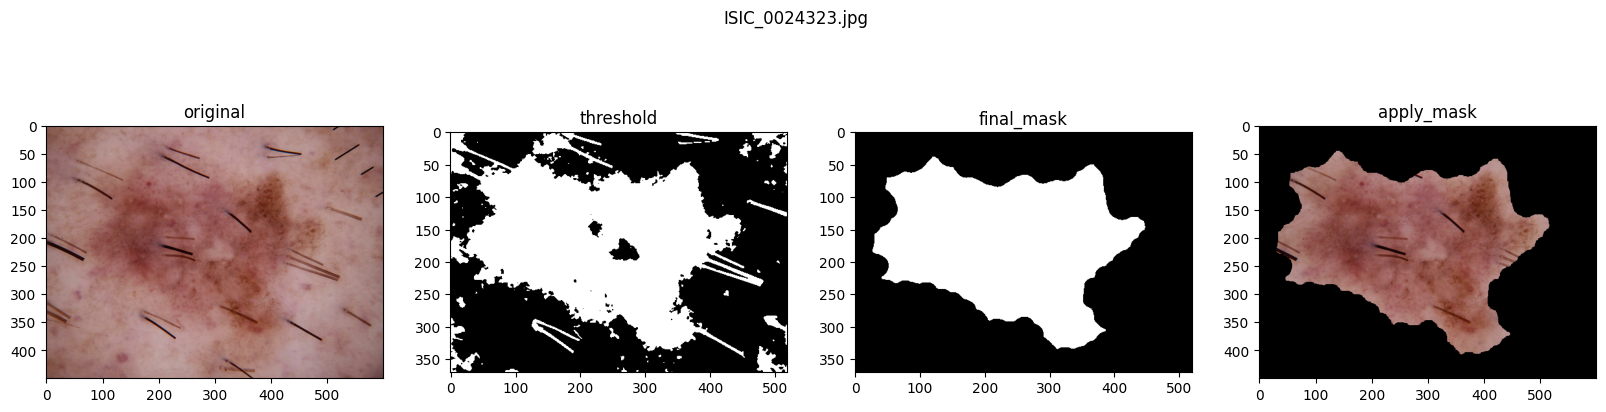

In [24]:
name = files_names[files_names.index('ISIC_0024323.jpg')]
image = cv2.imread(folder+'/'+name)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

filter = borderfilter(gray)
blur = cv2.medianBlur(filter,3)

max_value = np.amax(blur)

mask = thresh(blur,max_value)
erosion = erode(mask)
result = max_objects(erosion)
final_mask = fill_empty(result)
apply = apply_mask(image_rgb,final_mask)

img_show(image_rgb, mask, final_mask, apply,name)

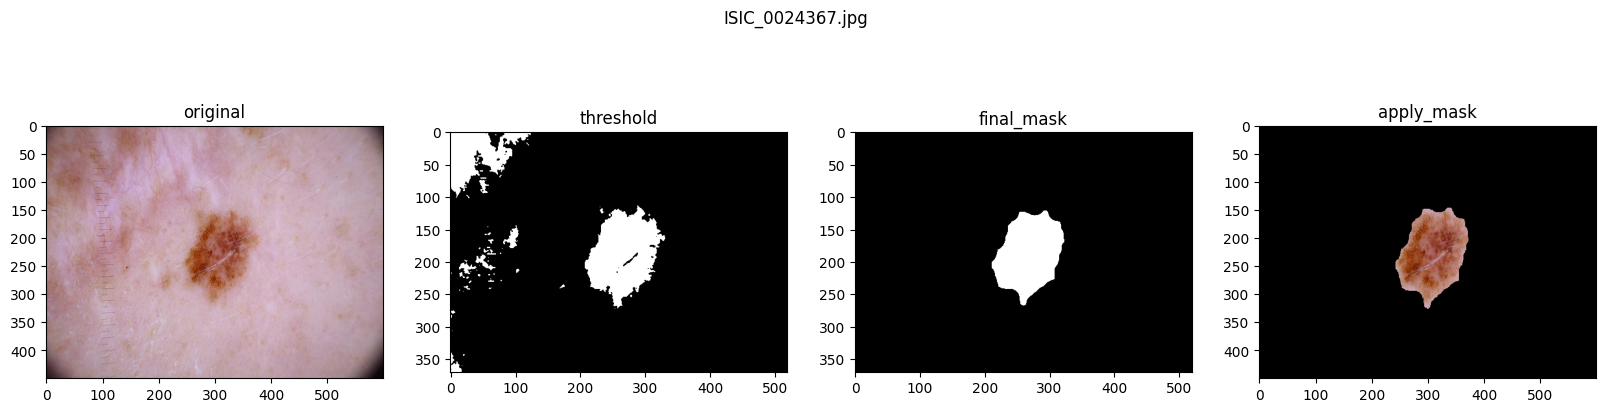

In [25]:
name = files_names[files_names.index('ISIC_0024367.jpg')]
image = cv2.imread(folder+'/'+name)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

filter = borderfilter(gray)
blur = cv2.medianBlur(filter,3)

max_value = np.amax(blur)

mask = thresh(blur,max_value)
erosion = erode(mask)
result = max_objects(erosion)
final_mask = fill_empty(result)
apply = apply_mask(image_rgb,final_mask)

img_show(image_rgb, mask, final_mask, apply,name)

204


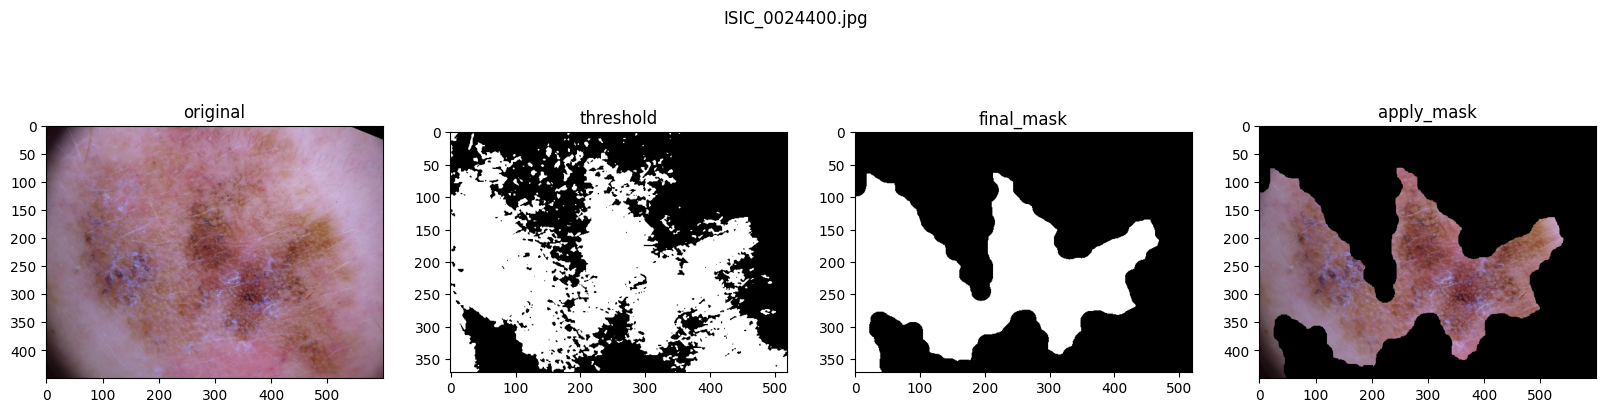

In [27]:
name = files_names[files_names.index('ISIC_0024400.jpg')]
image = cv2.imread(folder+'/'+name)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



filter = borderfilter(gray)
blur = cv2.medianBlur(filter,3)

max_value = np.amax(blur)
print(max_value)

mask = thresh(blur,max_value)
erosion = erode(mask)
result = max_objects(erosion)
final_mask = fill_empty(result)
apply = apply_mask(image_rgb,final_mask)

img_show(image_rgb, mask, final_mask, apply,name)